<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Jul 14 15:47:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.52                 Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              3W /   95W |       0MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

2.7.1+cu128


device(type='cuda')

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting occurs when a machine learning model learns the details and noise in the training data to the extent that it negatively impacts the model's performance on new data. This means the model performs exceptionally well on the training data but fails to generalize to unseen data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Cross-validation
- Train with more data
- Remove features
- Early stopping

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torch
import torchvision

train_dataset = torchvision.datasets.MNIST(root="data", 
                                           download=True, 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root="data", 
                                           download=True, 
                                           train=False, 
                                           transform=torchvision.transforms.ToTensor())

len(train_dataset), len(test_dataset)

(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

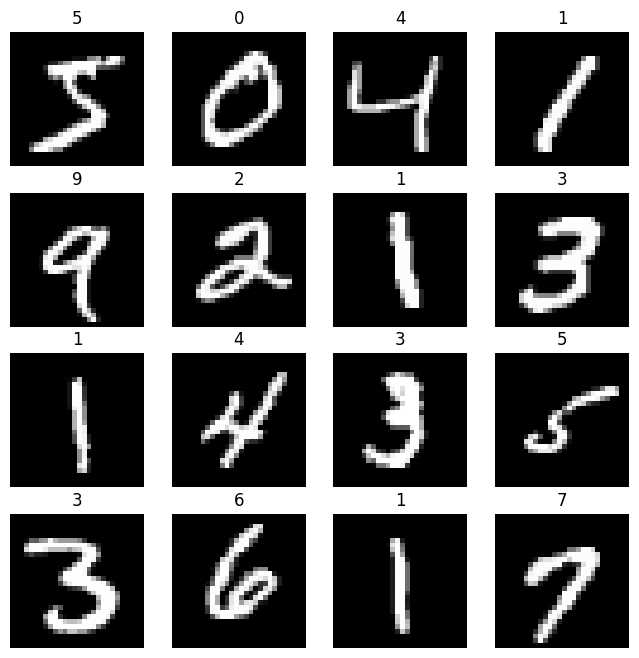

In [4]:
import matplotlib.pyplot as plt

nrow = 4
ncol = 4 
plt.figure(figsize=(ncol * 2, nrow * 2))
for i in range(nrow * ncol):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(train_dataset.data[i], cmap="gray")
    plt.title(f"{train_dataset.targets[i].item()}")
    plt.axis(False)
torch.unique(train_dataset.targets)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, 
                              batch_size=32)
test_dataloader = DataLoader(test_dataset,
                             batch_size=32)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
train_single_batch = next(iter(train_dataloader))
train_single_batch[0].shape, train_single_batch[1].shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [7]:
import torch.nn as nn
class TinyVGGModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=3), # batch * 1 * 28 * 28 -> batch * 10 * 26 * 26
            nn.ReLU(),
            nn.Conv2d(10, 10, kernel_size=3), # batch * 10 * 26 * 26 -> batch * 10 * 24 * 24
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # batch * 10 * 24 * 24 -> batch * 10 * 12 * 12
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(10, 10, kernel_size=3), # batch * 10 * 12 * 12 -> batch * 10 * 10 * 10
            nn.ReLU(),
            nn.Conv2d(10, 10, kernel_size=3), # batch * 10 * 10 * 10 -> batch * 10 * 8 * 8
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # batch * 10 * 8 * 8 -> batch * 10 * 4 * 4
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*4*4, out_features=10)
        )
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.classifier(x)
        return x

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [8]:
device

device(type='cuda')

In [9]:
model_cpu = TinyVGGModel()
model_gpu = TinyVGGModel().to(device)

In [45]:
def train_step(model: nn.Module, X, y, loss_fn, optimizer, device=None):
    # Forward pass
    model.train()
    if device:
        X, y = X.to(device), y.to(device)
    y_logits = model(X)
    loss = loss_fn(y_logits, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss

def test_step(model: nn.Module, X, y, loss_fn, device=None):
    # Forward pass

    if device:
        X, y = X.to(device), y.to(device)
    y_logits = model(X)
    loss = loss_fn(y_logits, y)

    y_probs = torch.softmax(y_logits, dim=1)
    y_preds = torch.argmax(y_probs, dim=1)

    acc = torch.sum(y_preds == y).item() / len(y_preds)

    return loss, acc

In [46]:
from tqdm import tqdm
from time import time
def train_model(model: nn.Module, train_dataloader, test_dataloader, 
                loss_fn, optimizer, epochs, device=None):
    start = time()
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}...")
        train_loss = 0
        test_loss = 0
        test_acc = 0
        model.train()
        for X, y in tqdm(train_dataloader):
            loss = train_step(model, X, y, loss_fn, optimizer, device)
            train_loss += loss.item()

        # Test the model
        model.eval()
        with torch.inference_mode():
            for X, y in test_dataloader:
                loss, acc = test_step(model, X, y, loss_fn, device)
                test_loss += loss.item()
                test_acc += acc

        print(f"Epoch: {epoch+1}, Train Loss: {train_loss/len(train_dataloader):.4f}, "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc/len(test_dataloader):.4f}")
    end = time()
    print(f"Training completed in {end - start:.2f} seconds.")


In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cpu.parameters(), lr=0.001)
train_model(model_cpu, train_dataloader, test_dataloader, loss_fn=loss_fn, optimizer=optimizer, epochs=5)

Epoch 1/5...


100%|██████████| 1875/1875 [00:14<00:00, 133.50it/s]


Epoch: 1, Train Loss: 0.3127, Test Loss: 37.1029, Test Acc: 0.9628
Epoch 2/5...


100%|██████████| 1875/1875 [00:13<00:00, 135.27it/s]


Epoch: 2, Train Loss: 0.0984, Test Loss: 27.9706, Test Acc: 0.9709
Epoch 3/5...


100%|██████████| 1875/1875 [00:13<00:00, 137.25it/s]


Epoch: 3, Train Loss: 0.0726, Test Loss: 25.3303, Test Acc: 0.9759
Epoch 4/5...


100%|██████████| 1875/1875 [00:13<00:00, 137.48it/s]


Epoch: 4, Train Loss: 0.0608, Test Loss: 19.8876, Test Acc: 0.9808
Epoch 5/5...


100%|██████████| 1875/1875 [00:13<00:00, 134.70it/s]


Epoch: 5, Train Loss: 0.0531, Test Loss: 16.8798, Test Acc: 0.9824
Training completed in 74.17 seconds.


In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_gpu.parameters(), lr=0.001)
train_model(model_gpu, train_dataloader, test_dataloader, 
            loss_fn=loss_fn, optimizer=optimizer, epochs=5, device=device)

Epoch 1/5...


100%|██████████| 1875/1875 [00:05<00:00, 342.35it/s]


Epoch: 1, Train Loss: 0.2764, Test Loss: 38.3015, Test Acc: 0.9605
Epoch 2/5...


100%|██████████| 1875/1875 [00:04<00:00, 379.04it/s]


Epoch: 2, Train Loss: 0.0959, Test Loss: 26.1674, Test Acc: 0.9721
Epoch 3/5...


100%|██████████| 1875/1875 [00:04<00:00, 377.77it/s]


Epoch: 3, Train Loss: 0.0764, Test Loss: 25.8455, Test Acc: 0.9729
Epoch 4/5...


100%|██████████| 1875/1875 [00:05<00:00, 359.19it/s]


Epoch: 4, Train Loss: 0.0653, Test Loss: 23.7016, Test Acc: 0.9751
Epoch 5/5...


100%|██████████| 1875/1875 [00:04<00:00, 384.96it/s]


Epoch: 5, Train Loss: 0.0568, Test Loss: 22.0599, Test Acc: 0.9758
Training completed in 27.86 seconds.


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [48]:
def make_predictions(model: nn.Module, data_loader, device=None):
    model.eval()
    all_preds = []
    with torch.inference_mode():
        for X, _ in data_loader:
            if device:
                X = X.to(device)
            y_logits = model(X)
            y_probs = torch.softmax(y_logits, dim=1)
            y_preds = torch.argmax(y_probs, dim=1)
            all_preds.append(y_preds)
    return torch.cat(all_preds)

In [24]:
cpu_preds = make_predictions(model_cpu, test_dataloader)

accuracy_cpu = torch.sum(cpu_preds == test_dataset.targets).item() / len(test_dataset.targets)
print(f"CPU Model Accuracy: {accuracy_cpu:.4f}")

gpu_preds = make_predictions(model_gpu, test_dataloader, device=device)
accuracy_gpu = torch.sum(gpu_preds == test_dataset.targets).item() / len(test_dataset.targets)
print(f"GPU Model Accuracy: {accuracy_gpu:.4f}")

CPU Model Accuracy: 0.9824


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

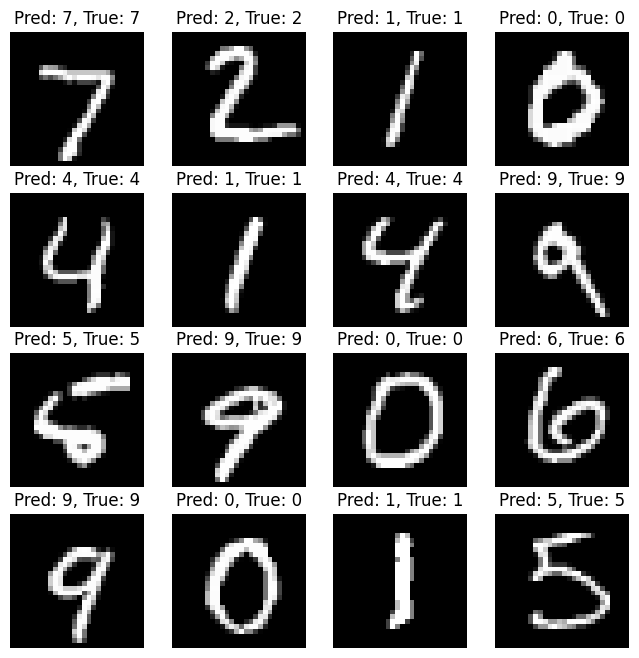

In [ ]:
nrow = 4
ncol = 4 
plt.figure(figsize=(ncol * 2, nrow * 2))
for i in range(nrow * ncol):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(test_dataset.data[i], cmap="gray")
    plt.title(f"Pred: {gpu_preds[i].item()}, True: {test_dataset.targets[i].item()}")
    plt.axis(False)
    

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [25]:
gpu_preds.device

device(type='cuda', index=0)

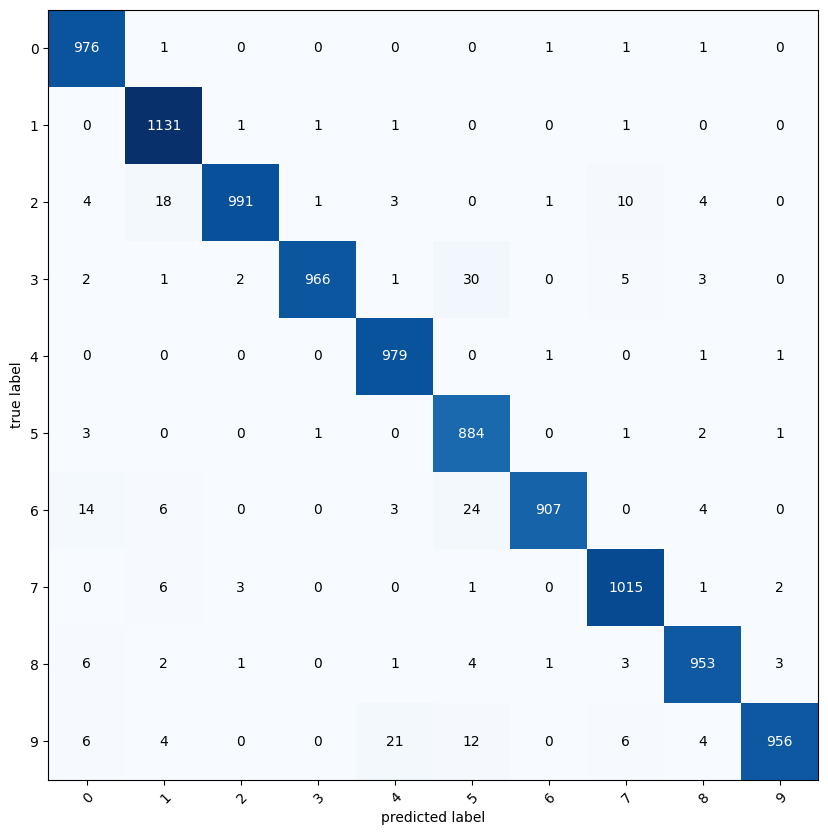

In [29]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confusion_matrix = ConfusionMatrix(num_classes=10, task='multiclass').to(device)
confusion_matrix = confusion_matrix(gpu_preds, test_dataset.targets.to(device))

fig, ax = plot_confusion_matrix(confusion_matrix.cpu().numpy(), class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], figsize=(10, 10))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [30]:
random_tensor = torch.rand(1, 3, 64, 64)

nn.Conv2d(3, 10, kernel_size=3)(random_tensor).shape

torch.Size([1, 10, 62, 62])

In [31]:
rand_tens = torch.rand(1, 3, 13, 13)
ok = nn.MaxPool2d(kernel_size=2)
ok(rand_tens).shape

torch.Size([1, 3, 6, 6])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [32]:
class TinyVGGModel(nn.Module):
    def __init__(self, input_channels, width, height, num_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(input_channels, 10, kernel_size=3), # batch * 1 * 28 * 28 -> batch * 10 * 26 * 26
            nn.ReLU(),
            nn.Conv2d(10, 10, kernel_size=3), # batch * 10 * 26 * 26 -> batch * 10 * 24 * 24
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # batch * 10 * 24 * 24 -> batch * 10 * 12 * 12
        )
        width = (width - 4) // 2
        height = (height - 4) // 2
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(10, 10, kernel_size=3), # batch * 10 * 12 * 12 -> batch * 10 * 10 * 10
            nn.ReLU(),
            nn.Conv2d(10, 10, kernel_size=3), # batch * 10 * 10 * 10 -> batch * 10 * 8 * 8
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # batch * 10 * 8 * 8 -> batch * 10 * 4 * 4
        )

        width = (width - 4) // 2
        height = (height - 4) // 2

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*width*height, out_features=num_classes)
        )
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.classifier(x)
        return x

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [34]:
train_dataset = torchvision.datasets.FashionMNIST(root="data",
                                                  download=True,
                                                  train=True,
                                                  transform=torchvision.transforms.ToTensor())

test_dataset = torchvision.datasets.FashionMNIST(root="data",
                                                    download=True,
                                                    train=False,
                                                    transform=torchvision.transforms.ToTensor())

test_dataset.data.shape, test_dataset.targets.shape, train_dataset.data.shape, train_dataset.targets.shape

(torch.Size([10000, 28, 28]),
 torch.Size([10000]),
 torch.Size([60000, 28, 28]),
 torch.Size([60000]))

In [35]:
train_dataloader = DataLoader(train_dataset,
                                batch_size=32)
test_dataloader = DataLoader(test_dataset,
                                batch_size=32)

len(train_dataloader), len(test_dataloader)

(1875, 313)

In [40]:
torch.randint(0, len(train_dataset), size=()).item()

30753

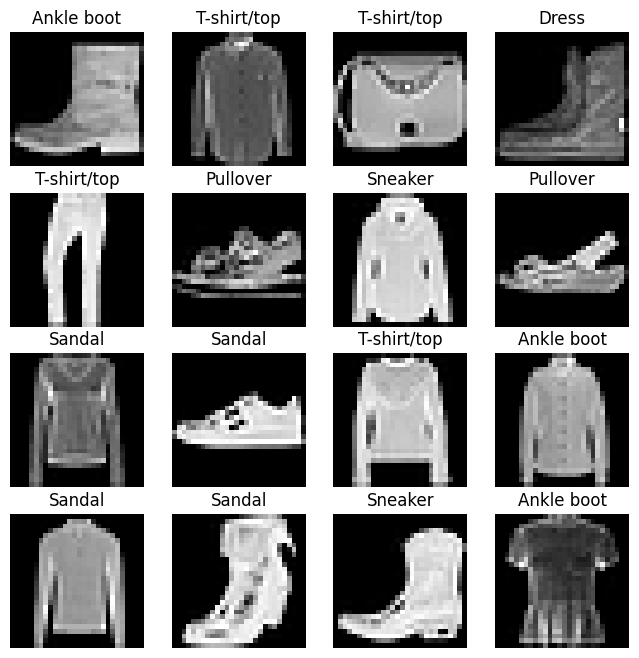

In [42]:
torch.manual_seed(42)
class_names = train_dataset.classes
nrow, ncol = 4, 4 
plt.figure(figsize=(ncol * 2, nrow * 2))
for i in range(nrow * ncol):
    plt.subplot(nrow, ncol, i + 1)
    random_index = int(torch.randint(0, len(train_dataset), size=()).item())
    plt.imshow(train_dataset.data[random_index], cmap="gray")
    plt.title(f"{class_names[int(train_dataset.targets[i].item())]}")
    plt.axis(False)

In [43]:
model_fashion = TinyVGGModel(input_channels=1, width=28, height=28, num_classes=len(class_names)).to(device)
jmodel_fashion

TinyVGGModel(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [47]:
loss_fn = nn.CrossEntropyLoss()
optimizer_fashion = torch.optim.Adam(model_fashion.parameters(), lr=0.001)
train_model(model=model_fashion, 
            train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
            loss_fn=loss_fn, optimizer=optimizer_fashion, epochs=5, device=device)

Epoch 1/5...


100%|██████████| 1875/1875 [00:05<00:00, 351.01it/s]


Epoch: 1, Train Loss: 0.6397, Test Loss: 159.1137, Test Acc: 0.8131
Epoch 2/5...


100%|██████████| 1875/1875 [00:05<00:00, 346.36it/s]


Epoch: 2, Train Loss: 0.4289, Test Loss: 129.8096, Test Acc: 0.8513
Epoch 3/5...


100%|██████████| 1875/1875 [00:05<00:00, 364.96it/s]


Epoch: 3, Train Loss: 0.3765, Test Loss: 118.9836, Test Acc: 0.8658
Epoch 4/5...


100%|██████████| 1875/1875 [00:04<00:00, 392.14it/s]


Epoch: 4, Train Loss: 0.3487, Test Loss: 113.8061, Test Acc: 0.8729
Epoch 5/5...


100%|██████████| 1875/1875 [00:05<00:00, 350.82it/s]


Epoch: 5, Train Loss: 0.3302, Test Loss: 108.6211, Test Acc: 0.8782
Training completed in 28.42 seconds.


In [49]:
y_preds = make_predictions(model_fashion, test_dataloader, device=device)
y_preds[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], device='cuda:0')

In [51]:
accuracy = torch.sum(y_preds == test_dataset.targets.to(device)).item() / len(test_dataset.targets)
accuracy

0.8782

In [62]:
# Filter wrong predictions
wrong_preds = y_preds != test_dataset.targets.to(device)
wrong_indices = torch.where(wrong_preds)[0]
len(wrong_indices)

1218

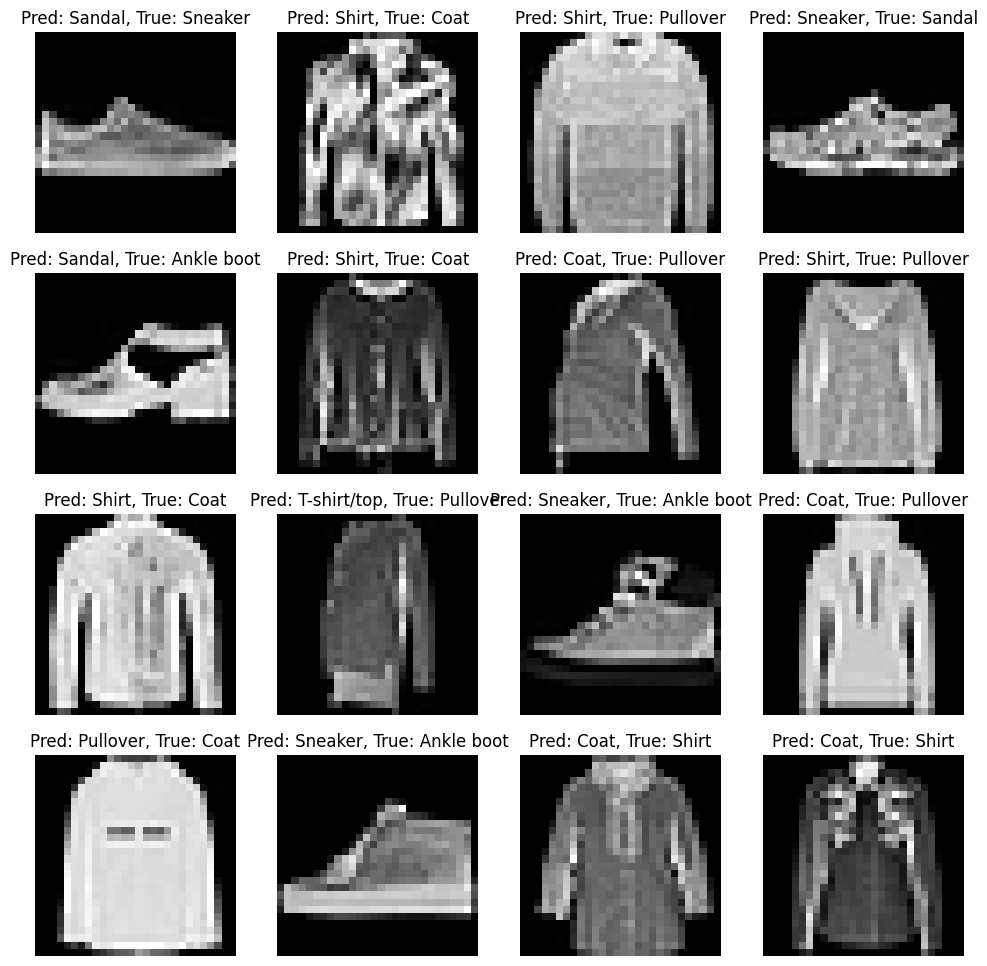

In [65]:
nrow, ncol = 4, 4
plt.figure(figsize=(ncol * 3, nrow * 3))
for i in range(nrow * ncol):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(test_dataset.data[wrong_indices[i]], cmap="gray")
    pred_id = int(y_preds[wrong_indices[i]].item())
    true_id = int(test_dataset.targets[wrong_indices[i]].item())
    plt.title(f"Pred: {class_names[pred_id]}, True: {class_names[true_id]}")
    plt.axis(False)